# <CENTER> <b>   SKillCraftTechnology Data Science TASK-2

### Load and Explore the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

file_path = r"C:\Users\Lenovo\Downloads\archive\US_Accidents_March23.csv"

# Read in chunks of 100,000 rows
chunk_size = 100000  
df_chunks = pd.read_csv(file_path, chunksize=chunk_size)

# Process only the first chunk
df = next(df_chunks)  

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

### Analyze Road Conditions & Accidents


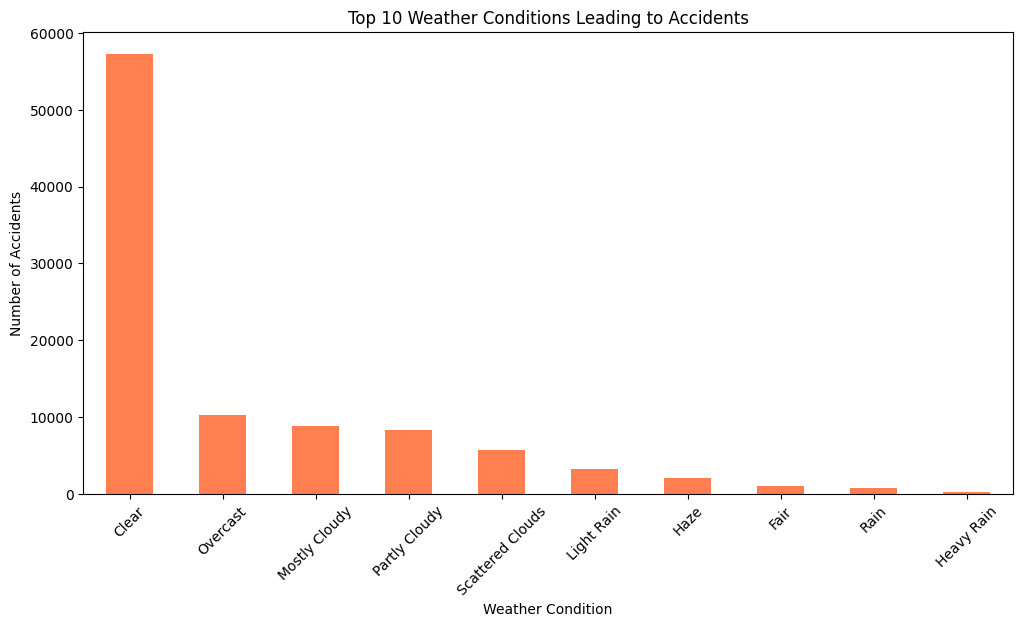

In [4]:
# Check accident counts based on road conditions
road_conditions = df.groupby('Weather_Condition')['ID'].count().sort_values(ascending=False)

# Visualize top road conditions causing accidents
plt.figure(figsize=(12,6))
road_conditions[:10].plot(kind='bar', color='coral')
plt.title("Top 10 Weather Conditions Leading to Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


### Analyze Weather Conditions & Accidents

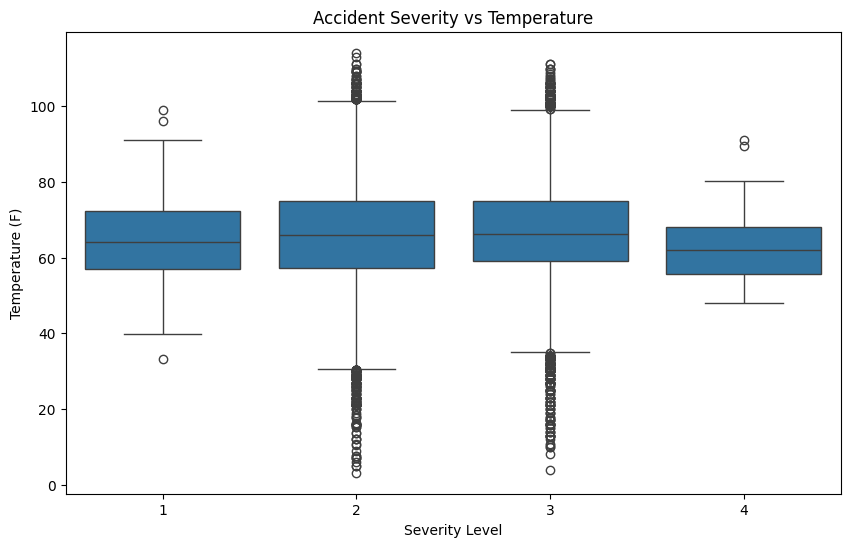

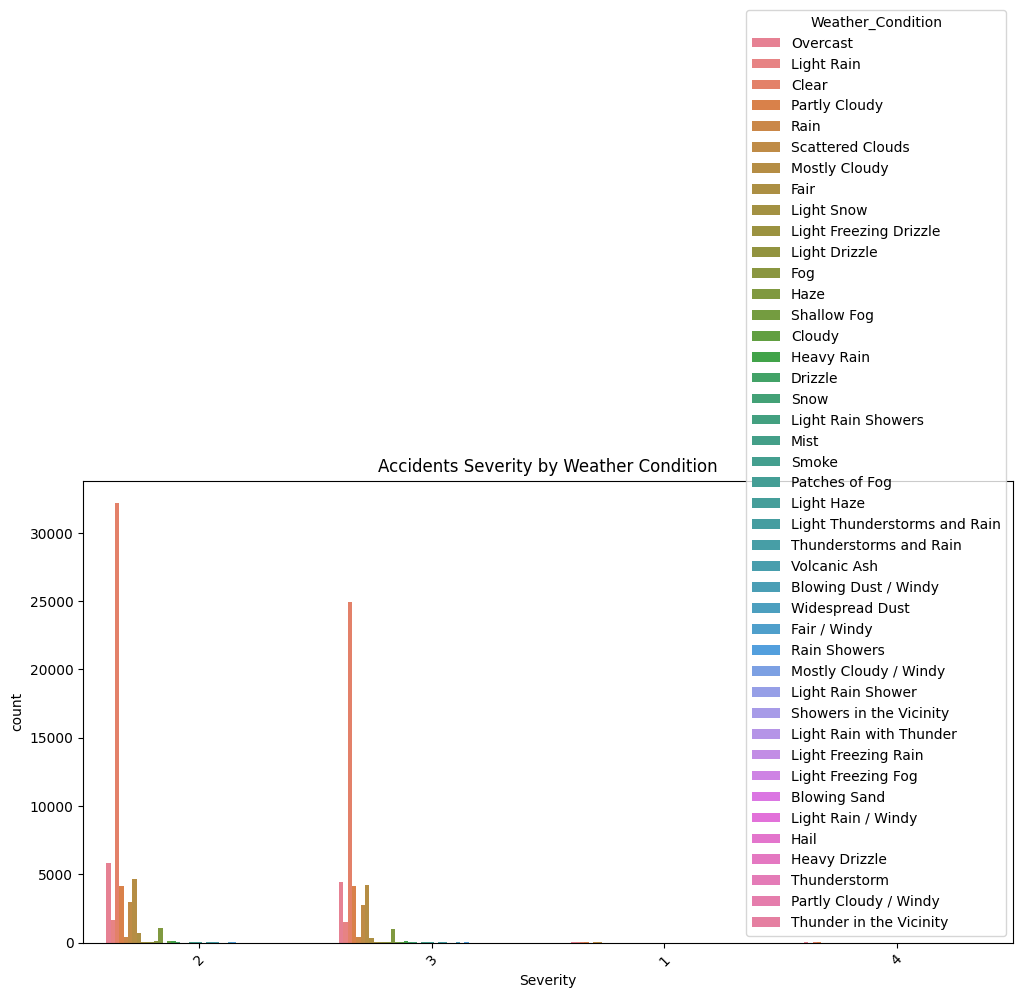

In [5]:
# Analyze accident severity based on weather
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title("Accident Severity vs Temperature")
plt.xlabel("Severity Level")
plt.ylabel("Temperature (F)")
plt.show()

# Countplot of accidents under different weather conditions
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Severity', hue='Weather_Condition', order=df['Severity'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidents Severity by Weather Condition")
plt.show()


# Analyze Time of Day Trends

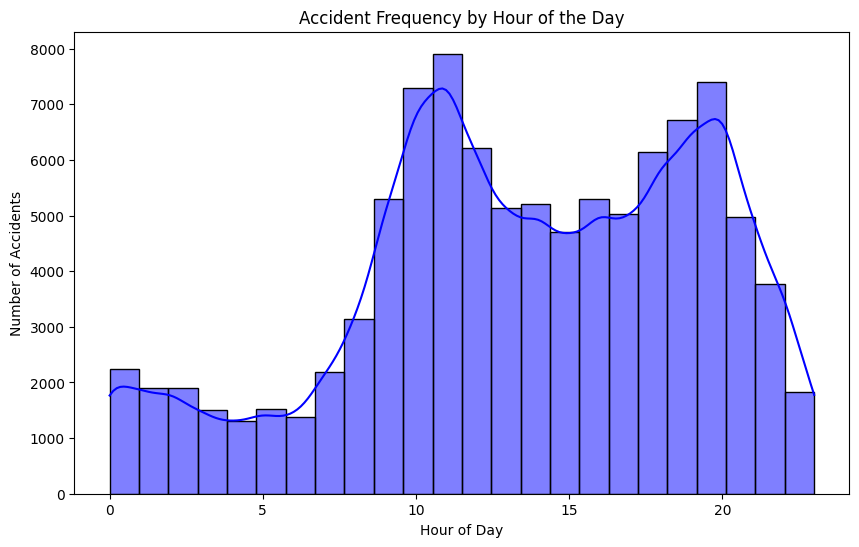

In [6]:
# Convert Start_Time to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour of accident
df['Hour'] = df['Start_Time'].dt.hour

# Plot accident counts by hour
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')
plt.title("Accident Frequency by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()


### Visualizing Accident Hotspots on a Map

In [7]:
# Sample 10,000 data points to avoid performance issues
df_sample = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000, random_state=42)

# Create a folium map centered around an average location
m = folium.Map(location=[df_sample['Start_Lat'].mean(), df_sample['Start_Lng'].mean()], zoom_start=5)

# Add heatmap
heat_data = list(zip(df_sample['Start_Lat'], df_sample['Start_Lng']))
HeatMap(heat_data).add_to(m)

# Save map
m.save("accident_hotspots.html")
m  


## Final Takeaways
✅ Accident Hotspots: Major highways and city intersections are high-risk areas.
✅ Weather Impact: Rain, snow, and fog increase accident risks.
✅ Time of Day: Rush hours and late nights see the highest accidents.
✅ Environmental Factors: Poor visibility and extreme weather contribute to severe crashes.